In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from astropy.coordinates import SkyCoord
from astropy import units as u
import peakutils

import aplpy
from astropy.io import fits
import astropy.wcs as wcs

from astropy.time import Time as aTime

import datetime as dt, time

import pandas as pd

import warnings
warnings.filterwarnings("ignore")

: 

In [2]:
with open('rfc_2023b.txt') as w:
    rfc2023b = np.array([s.split() for s in w.readlines()[211:]])
    
r = rfc2023b[:,(0,2,3,6,9,10,11,12,15,16,17,18)]

ra_hms = np.zeros(shape=rfc2023b.shape[0]).astype(str)
dc_dms = np.zeros(shape=rfc2023b.shape[0]).astype(str)
for i in range(rfc2023b.shape[0]):
    ra_hms[i]= '{}h{}m{}s'.format(rfc2023b[i,3],rfc2023b[i,4],rfc2023b[i,5])
    dc_dms[i]= '{}d{}m{}s'.format(rfc2023b[i,6],rfc2023b[i,7],rfc2023b[i,8])
    
r[:,2] = ra_hms
r[:,3] = dc_dms

R = pd.DataFrame(r,columns=['G','Name','RA','DEC','xerr','yerr','xyc','obs','C','Cures','X','Xures'])

In [3]:
#t1 = SkyCoord('18h40m34.51s -04d57m14.4s')
#t1 = SkyCoord('18h41m51.06s -05d01m43.5s') 
#t1 = SkyCoord('18h34m36.84s -08d01m00.7s') #g023
#t1 = SkyCoord('18h30m36.07s -10d07m10.9s') #g027.50
t1 = SkyCoord('18h47m54.68s -01d34m56.9s')  #g031.12

c = SkyCoord(ra_hms,dc_dms)

sep1 = (c.separation(t1).value < 5.0)

In [4]:
indx  = (R['X'].astype(float) > .07)*sep1
c1    = c[indx]
names = r[indx,1]

In [5]:
names, c.separation(t1).value[indx]

(array(['J1832+0118', 'J1833+0115', 'J1834-0301', 'J1846-0003',
        'J1848+0138', 'J1851+0035', 'J1853-0048', 'J1855+0251',
        'J1857-0303', 'J1857-0048', 'J1858-0048', 'J1900-0415',
        'J1902-0458'], dtype='<U10'),
 array([4.78057548, 4.66179469, 3.70728277, 1.59043077, 3.22518399,
        2.37998879, 1.63770989, 4.83512377, 2.77677582, 2.60403241,
        2.66840945, 4.0908124 , 4.96060864]))

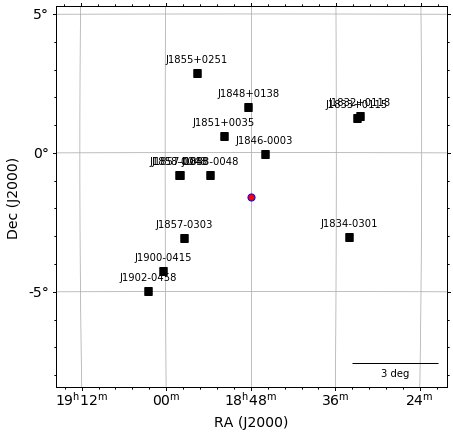

In [11]:
imgpath = '/Users/Lucas/fits/1131m167_ac51-w1-int-3.fits'
hdu = fits.getheader(imgpath)
w = wcs.WCS(imgpath).celestial

n = 35
w.array_shape = (1024*n-1,1024*n-1)
w.wcs.crpix = np.array([(w.array_shape[0]+1)/2,(w.array_shape[0]+1)/2])
w.wcs.crval = np.array([t1.ra.value,t1.dec.value])

srcs = c[:6]

#xoffs = [-2.2, 2.2,-2.2, 2.2, 2.2,-2.2]
#yoffs = [ 0, 0, 0, 0, 0, 0]

fig1 = plt.figure(figsize=(7,7));
ax   = aplpy.FITSFigure(w, figure=fig1,convention='calabretta')

ax.axis_labels.set_font(size='14')
ax.tick_labels.set_font(size='14');

ax.ax.grid(True)
ax.add_scalebar(3*u.deg,'3 deg')

ax.show_markers(t1.ra.deg,t1.dec.deg,s=50,marker='o',
                edgecolor='blue',linewidth=1,fc='red',zorder=99)

ax.show_markers(c1.ra.deg,c1.dec.deg,s=50,
                marker='s',edgecolor='k',linewidth=0.5,fc='k',zorder=99);

for i in range(len(names)):
    ax.add_label(c1[i].ra.deg,c1[i].dec.deg+0.5,names[i])


In [7]:
R[(R['X'].astype(float) > .07)*sep1]

,G,Name,RA,DEC,xerr,yerr,xyc,obs,C,Cures,X,Xures
17152,C,J1832+0118,18h32m40.0,+01d18m16.,0.12,0.17,-0.119,489,-1.00,-1.00,0.126,0.064
17160,C,J1833+0115,18h33m07.7,+01d15m35.,0.11,0.14,-0.226,629,0.485,0.291,0.338,0.177
17179,C,J1834-0301,18h34m14.0,-03d01m19.,0.12,0.17,0.034,1719,0.147,0.026,0.148,0.025
17344,C,J1846-0003,18h46m03.7,-00d03m38.,0.23,0.48,0.074,338,-1.00,-1.00,0.078,0.041
17365,C,J1848+0138,18h48m21.8,+01d38m26.,0.46,0.75,-0.014,145,-1.00,-1.00,0.082,-1.00
17420,C,J1851+0035,18h51m46.7,+00d35m32.,0.30,0.37,0.315,303,0.311,-1.00,0.320,0.062
17439,C,J1853-0048,18h53m41.9,-00d48m54.,0.58,0.81,0.366,98,-1.00,-1.00,0.073,-1.00
17454,C,J1855+0251,18h55m35.4,+02d51m19.,0.12,0.16,-0.094,2152,0.138,-1.00,0.155,0.011
17481,C,J1857-0303,18h57m19.8,-03d03m25.,0.47,0.95,-0.241,36,0.067,0.037,0.095,0.053
17486,C,J1857-0048,18h57m51.3,-00d48m21.,0.14,0.23,0.033,1292,0.093,-1.00,0.117,0.034


In [9]:
t = np.arange(30,120,1)
rms = 1.2*np.sqrt(4000*800)/np.sqrt(2*2*512e6*t)*1000

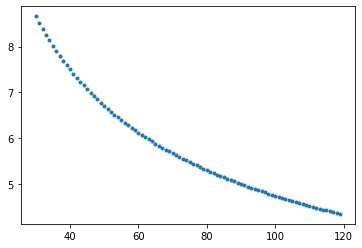

In [10]:
fig, ax = plt.subplots(1)
ax.plot(t,rms,'.')

In [199]:
c.separation(t1).value[(R[8].astype(float) > .07)*sep1]

array([4.82691179, 4.57491038, 3.30933333, 2.49649015, 3.90668145,
       4.61729572, 4.84554331, 4.58876695, 4.96421352])

In [239]:
#with open('icrf3.txt') as w:
#    icrf3 = [s.split() for s in w.readlines()[22:]]

In [261]:
icrf3 = pd.read_fwf('icrf3.txt',skiprows=22).values

In [265]:
ra_hms = np.zeros(shape=icrf3.shape[0]).astype(str)
dc_dms = np.zeros(shape=icrf3.shape[0]).astype(str)
for i in range(icrf3.shape[0]):
    ra_hms[i]= '{}h{}m{}s'.format(icrf3[i,4],icrf3[i,5],icrf3[i,6])
    dc_dms[i]= '{}d{}m{}s'.format(icrf3[i,7],icrf3[i,8],icrf3[i,9])

In [266]:
ICRF3 = SkyCoord(ra_hms,dc_dms)

In [294]:
I1 = ICRF3[ICRF3.separation(t1).value<3]

In [295]:
c1 = c[c.separation(t1).value<3]

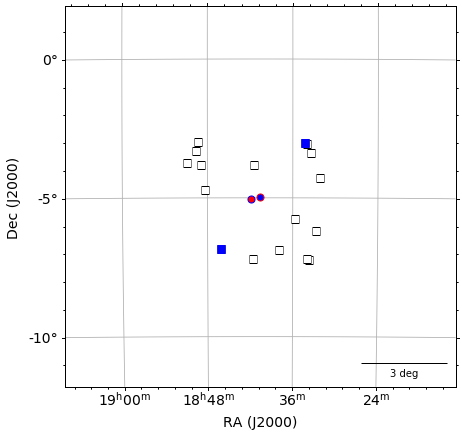

In [296]:
imgpath = '/Users/Lucas/fits/1131m167_ac51-w1-int-3.fits'
hdu = fits.getheader(imgpath)
w = wcs.WCS(imgpath).celestial

n = 35
w.array_shape = (1024*n-1,1024*n-1)
w.wcs.crpix = np.array([(w.array_shape[0]+1)/2,(w.array_shape[0]+1)/2])
w.wcs.crval = np.array([t1.ra.value,t1.dec.value])

srcs = c[:6]

#xoffs = [-2.2, 2.2,-2.2, 2.2, 2.2,-2.2]
#yoffs = [ 0, 0, 0, 0, 0, 0]

fig1 = plt.figure(figsize=(7,7));
ax = aplpy.FITSFigure(w, figure=fig1,convention='calabretta')

ax.axis_labels.set_font(size='14')
ax.tick_labels.set_font(size='14');

ax.ax.grid(True)
ax.add_scalebar(3*u.deg,'3 deg')

ax.show_markers(t1.ra.deg,t1.dec.deg,s=50,marker='o',
                edgecolor='red',linewidth=1,fc='blue',zorder=99)
ax.show_markers(t2.ra.deg,t2.dec.deg,s=50,marker='o',
                edgecolor='blue',linewidth=1,fc='red',zorder=99)

ax.show_markers(c1.ra.deg,c1.dec.deg,s=50,
                marker='s',edgecolor='k',linewidth=0.5,fc='w',zorder=99);

ax.show_markers(I1.ra.deg,I1.dec.deg,s=50,
                marker='s',edgecolor='b',linewidth=0.5,fc='b',zorder=99);

#for i in range(len(names)):
#    ax.add_label(c1[i].ra.deg,c1[i].dec.deg+0.5,names[i])


In [299]:
icrf3[ICRF3.separation(t1).value<3,2]

array(['1831-030', '1843-069'], dtype=object)